In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.__version__

'1.5.3'

In [3]:
 plt.rcParams["font.family"] = "serif"

## Data inspection
Getting some insights to the data to understand each feature and see if there are any problems.

In [4]:
# load the dataset
housing = pd.read_csv('dataset.csv')
housing.shape

(10000, 14)

In [5]:
housing.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Sweden,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Denmark,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Sweden,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Sweden,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Denmark,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
housing.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
pd.unique(housing['Geography'])

array(['Sweden', 'Denmark', 'Finland'], dtype=object)

In [9]:
pd.unique(housing['Gender'])

array(['Female', 'Male'], dtype=object)

Let's clone the dataset and work on the numerical features first.

In [10]:
# make a copy of the housing data
data = pd.DataFrame(housing)

In [11]:
data = data.replace('Female', 0)

In [12]:
data = data.replace('Male', 1)

In [13]:
data = data.replace('Sweden', 1)

In [14]:
data = data.replace('Denmark', 2)

In [15]:
data = data.replace('Finland', 3)

In [16]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data[data['IsActiveMember'] == 0].shape

(4849, 14)

C:\Users\Connor\AppData\Local\Temp\ipykernel_268\3600383969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  housing.groupby(['Geography']).sum().plot(kind='pie', y='Exited', autopct='%1.0f%%', #colors=colors,


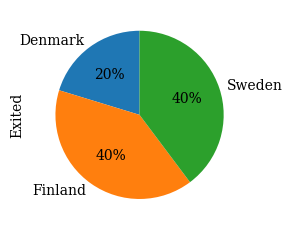

In [278]:
housing.groupby(['Geography']).sum().plot(kind='pie', y='Exited', autopct='%1.0f%%', #colors=colors,
                                       startangle=90, figsize=(3, 3), legend=None)
#legend = plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.show()

In [18]:
data[data['Exited'] == 1].shape

(2037, 14)

In [19]:
2037*100/10000

20.37

In [20]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,3,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,1,0,28,4,130142.79,1,1,0,38190.78,0


In [21]:
data[data['Tenure'] == 0]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411,1,1,29,0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,1,0,45,0,134264.04,1,1,0,27822.99,1
57,58,15647091,Endrizzi,725,3,1,19,0,75888.20,1,0,0,45613.75,0
72,73,15812518,Palermo,657,2,0,37,0,163607.18,1,0,1,44203.55,0
127,128,15782688,Piccio,625,3,1,56,0,148507.24,1,1,0,46824.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,9794,15772363,Hilton,772,3,0,42,0,101979.16,1,1,0,90928.48,0
9799,9800,15722731,Manna,653,1,1,46,0,119556.10,1,1,0,78250.13,1
9843,9844,15778304,Fan,646,3,1,24,0,92398.08,1,1,1,18897.29,0
9868,9869,15587640,Rowntree,718,1,0,43,0,93143.39,1,1,0,167554.86,0


In [22]:
# we work on 'data' from here on
# drop all non-numerical feature(s)
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


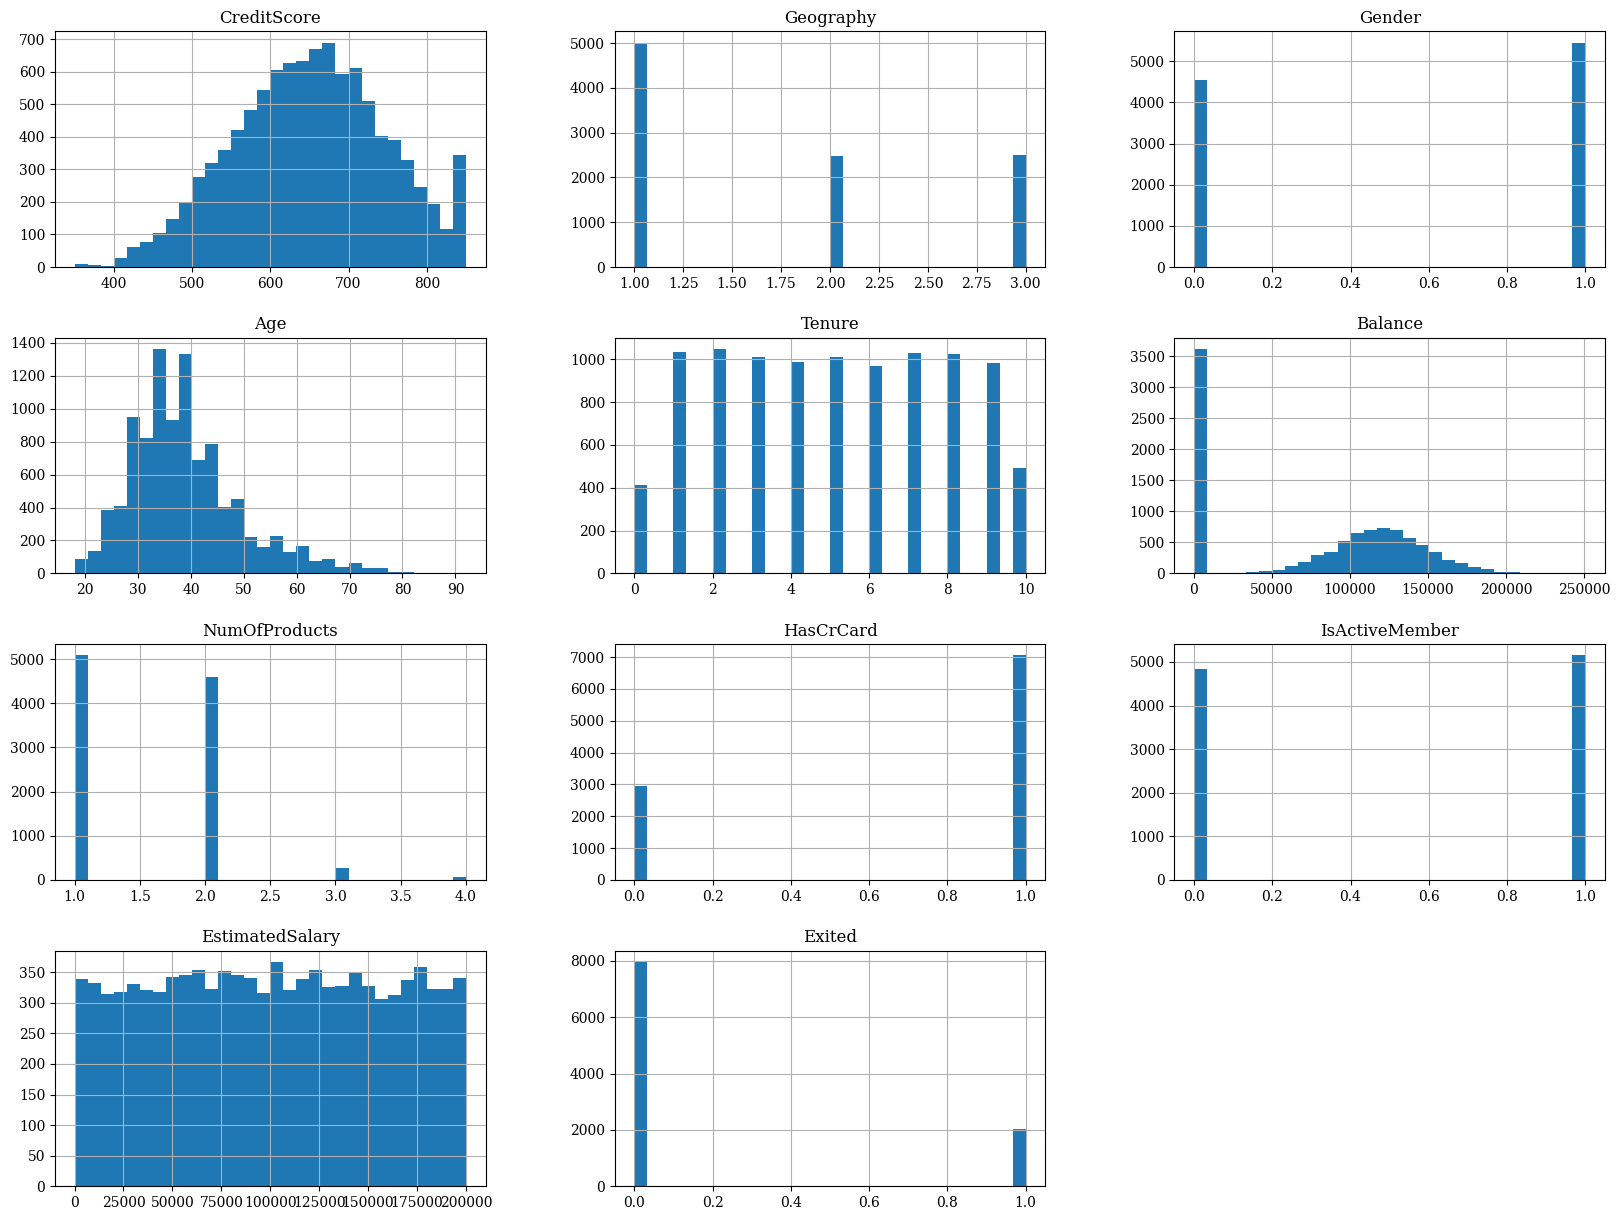

In [24]:
# plot histograms of all features
data.hist(bins=30, figsize=(20,15))
plt.show()

<AxesSubplot: xlabel='Balance', ylabel='Age'>

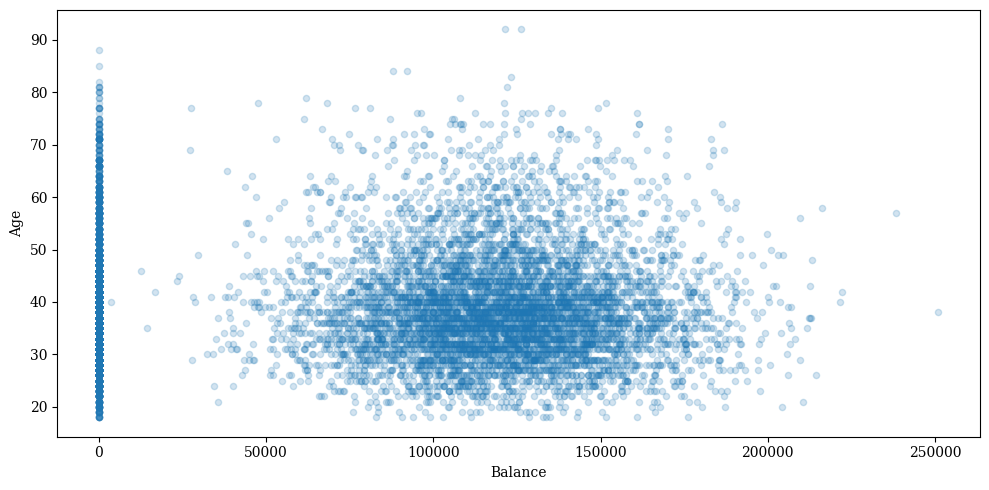

In [200]:
data.plot(kind='scatter', x='Balance', y='Age', alpha=0.2, figsize=(10, 5))

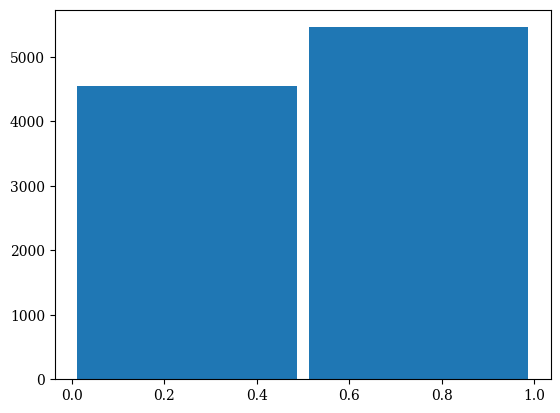

In [25]:
hist = data['Gender'].hist(bins=2, rwidth=0.95, align='mid', grid=False)

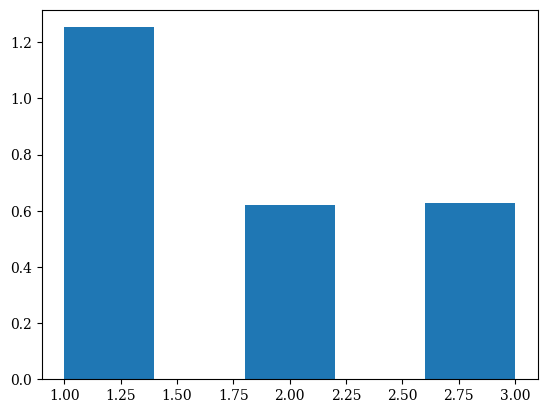

In [26]:
hist = data['Geography'].hist(bins=5, align='mid', grid=False, density=True)
#plt.xticks((np.arange(0,3,1)))
plt.show()

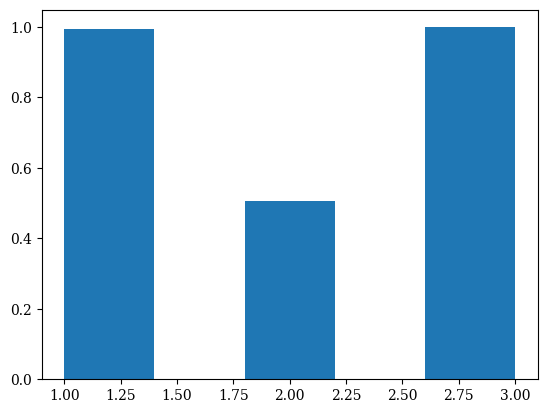

In [27]:
hist = data['Geography'][data['Exited'] == 1].hist(bins=5, align='mid', grid=False, density=True)
#plt.xticks((np.arange(0,3,1)))
plt.show()

In [28]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [29]:
exit   = data[data['Exited']==1]
remain = data[data['Exited']==0]

In [30]:
exit.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9981,498,3,1,42,3,152039.70,1,1,1,53445.17,1
9982,655,3,0,46,7,137145.12,1,1,0,115146.40,1
9991,597,1,0,53,4,88381.21,1,1,0,69384.71,1
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [31]:
remain.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9993,644,1,1,28,7,155060.41,1,1,0,29179.52,0
9994,800,1,0,29,2,0.00,2,0,0,167773.55,0
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9999,792,1,0,28,4,130142.79,1,1,0,38190.78,0


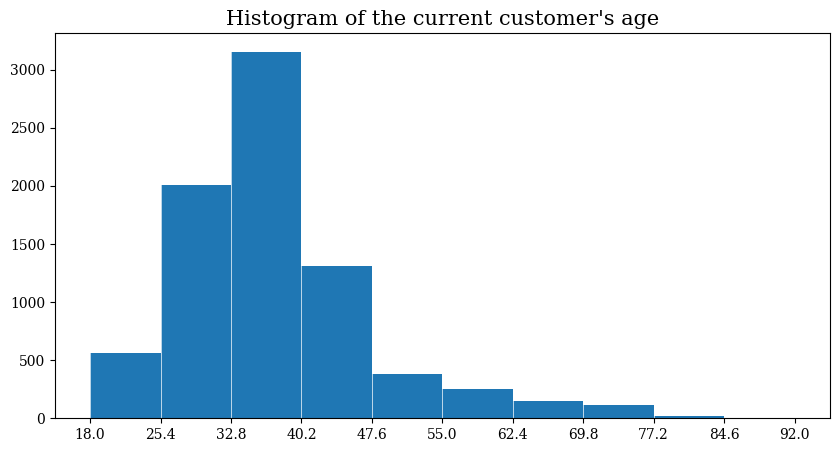

In [32]:
fig = plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(remain['Age'])
plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')
plt.title("Histogram of the current customer's age", fontsize = 15)
plt.show()

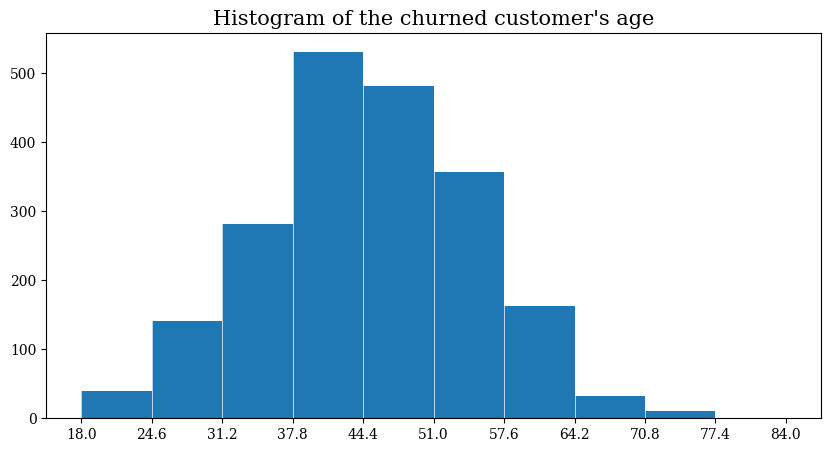

In [33]:
fig = plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(exit['Age'])
plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')
plt.title("Histogram of the churned customer's age", fontsize = 15)
plt.show()

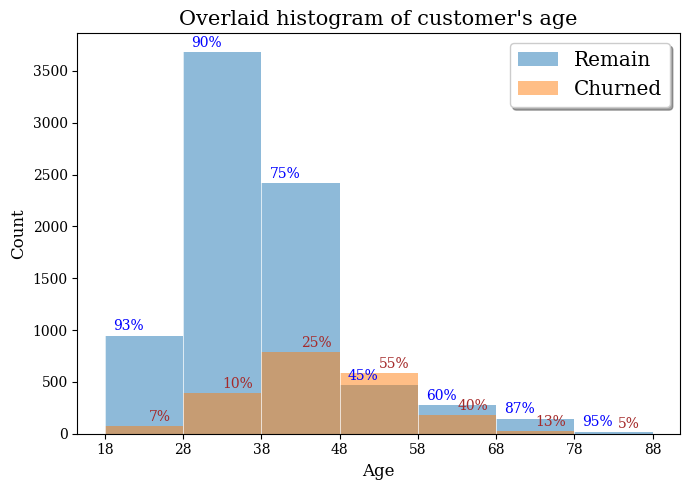

In [182]:
fig = plt.figure(figsize=(7,5))
xticks = [18, 28, 38, 48, 58, 68, 78, 88]
bins5 = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88]
n1, bins1, patches = plt.hist(remain['Age'], alpha=0.5, bins=xticks, label='Remain')
n2, bins2, patches = plt.hist(exit['Age'], alpha=0.5, bins=xticks, label='Churned')
plt.xticks(bins1)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(color='white', lw = 0.5, axis='x')
plt.title("Overlaid histogram of customer's age", fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# plot values on top of bars
for idx, value in enumerate(n1):
    if value > 0:
        plt.text(xticks[idx]+3, value+50, str(round(n1[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center', color='blue')

for idx, value in enumerate(n2):
    if value > 0:
        plt.text(xticks[idx]+7, value+50, str(round(n2[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center', color='brown')
        
plt.savefig('age_pct_hist.png', dpi=300)
plt.show()

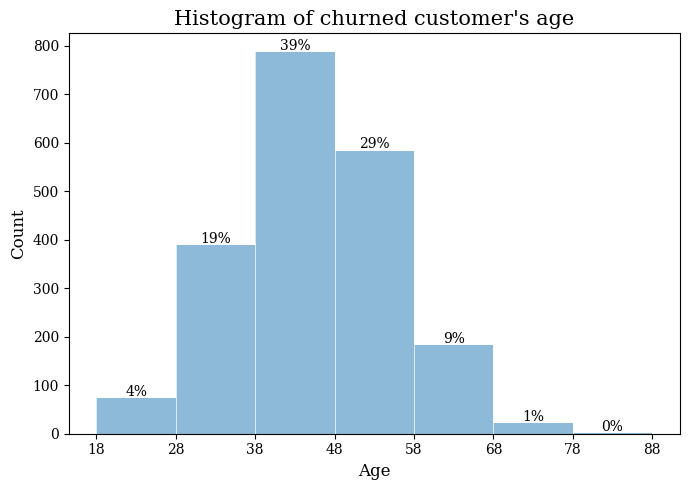

In [233]:
fig = plt.figure(figsize=(7,5))
xticks = [18, 28, 38, 48, 58, 68, 78, 88]
bins5 = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88]
#n1, bins1, patches = plt.hist(remain['Age'], alpha=0.5, bins=xticks, label='Remain')
n2, bins2, patches = plt.hist(exit['Age'], alpha=0.5, bins=xticks, label='Churned')
plt.xticks(bins1)
#legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(color='white', lw = 0.5, axis='x')
plt.title("Histogram of churned customer's age", fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# plot values on top of bars
#n1_sum = 0
n2_sum = 0
#for idx, value in enumerate(n1):
#    n1_sum = n1_sum + value
#for idx, value in enumerate(n1):    
#    if value > 0:
#        plt.text(xticks[idx]+3, value+50, str(round(value*100/n1_sum))+'%', ha='center', color='blue')

for idx, value in enumerate(n2):
    n2_sum = n2_sum + value
for idx, value in enumerate(n2): 
    if value > 0:
        plt.text(xticks[idx]+5, value+5, str(round(value*100/n2_sum))+'%', ha='center')
        
plt.savefig('churn_age_pct_hist.png', dpi=300)
plt.show()

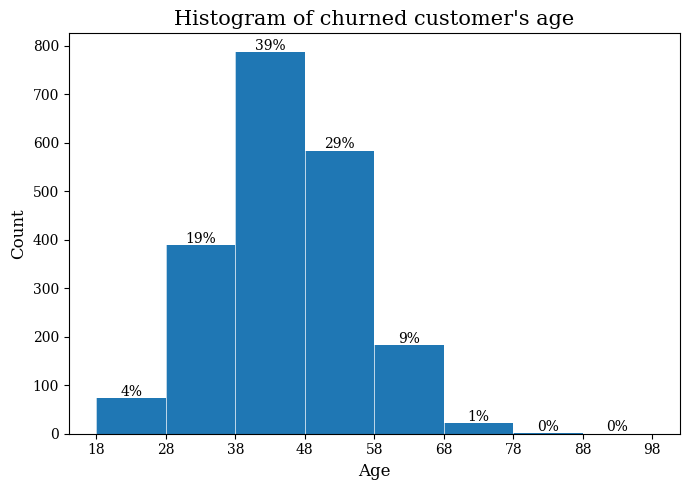

In [283]:
    fig = plt.figure(figsize=(7,5))
    xbins = [18, 28, 38, 48, 58, 68, 78, 88, 98]
    hist, bins, patches = plt.hist(exit['Age'], bins=xbins)
    plt.xticks(xbins)
    plt.grid(color='white', lw = 0.5, axis='x')
    plt.title("Histogram of churned customer's age", fontsize = 15)
    plt.xlabel('Age', fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    # print numbers on hist 
    n = 0
    for i in hist:
        n = n + i
    for idx, value in enumerate(hist): 
        plt.text(xbins[idx]+5, value+5, str(round(value*100/n))+'%', ha='center')

In [228]:
n1_sum

7961.0

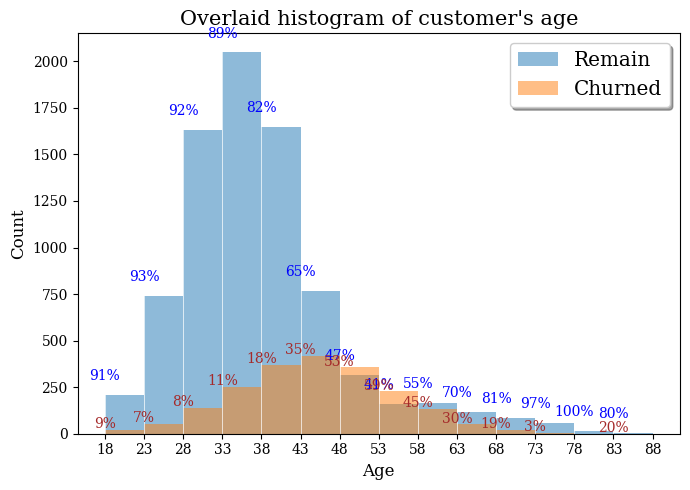

In [178]:
fig = plt.figure(figsize=(7,5))
#xticks = [18, 28, 38, 48, 58, 68, 78, 88]
xticks = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88]
n1, bins1, patches = plt.hist(remain['Age'], alpha=0.5, bins=xticks, label='Remain')
n2, bins2, patches = plt.hist(exit['Age'], alpha=0.5, bins=xticks, label='Churned')
plt.xticks(bins1)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(color='white', lw = 0.5, axis='x')
plt.title("Overlaid histogram of customer's age", fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# plot values on top of bars
for idx, value in enumerate(n1):
    if value > 0:
        plt.text(xticks[idx], value+80, str(round(n1[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center', color='blue')

for idx, value in enumerate(n2):
    if value > 0:
        plt.text(xticks[idx], value+10, str(round(n2[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center', color='brown')
        
plt.savefig('age_pct_hist_10bins.png', dpi=300)
plt.show()

In [35]:
# make a copy of the housing data
bank = pd.DataFrame(housing)

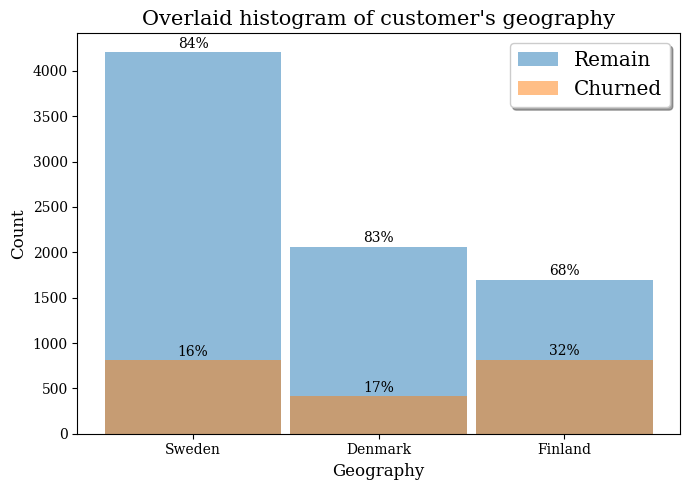

In [167]:
fig = plt.figure(figsize=(7,5))
binning = np.arange(4) + 0.5
n1, bins1, patches = plt.hist(remain['Geography'], alpha=0.5, label='Remain', bins=binning, rwidth=0.95)
n2, bins2, patches = plt.hist(exit['Geography'], alpha=0.5, label='Churned', bins=binning, rwidth=0.95)
#plt.xticks(range(4))
xticks = [1, 2, 3]
xticks_labels = ['Sweden', 'Denmark', 'Finland']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title("Overlaid histogram of customer's geography", fontsize = 15)
plt.xlabel('Geography', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# plot values on top of bars
for idx, value in enumerate(n1):
    if value > 0:
        plt.text(xticks[idx], value+50, str(round(n1[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center')

for idx, value in enumerate(n2):
    if value > 0:
        plt.text(xticks[idx], value+50, str(round(n2[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center')

plt.savefig('geo_pct_hist.png', dpi=300)
plt.show()

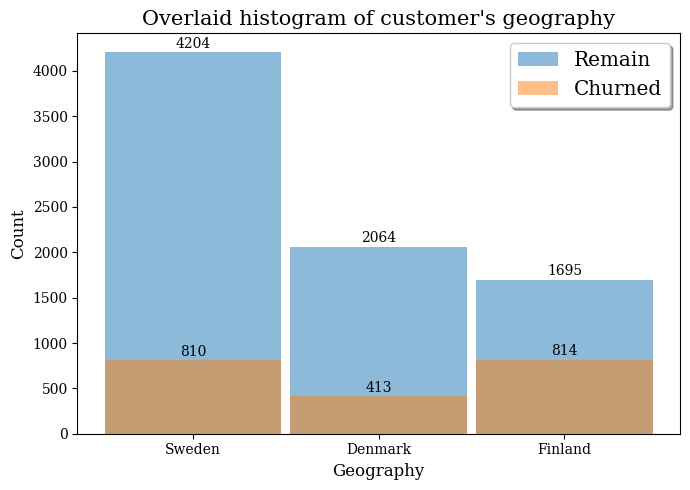

In [223]:
fig = plt.figure(figsize=(7,5))
binning = np.arange(4) + 0.5
n1, bins1, patches = plt.hist(remain['Geography'], alpha=0.5, label='Remain', bins=binning, rwidth=0.95)
n2, bins2, patches = plt.hist(exit['Geography'], alpha=0.5, label='Churned', bins=binning, rwidth=0.95)
#plt.xticks(range(4))
xticks = [1, 2, 3]
xticks_labels = ['Sweden', 'Denmark', 'Finland']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title("Overlaid histogram of customer's geography", fontsize = 15)
plt.xlabel('Geography', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# plot values on top of bars
for idx, value in enumerate(n1):
    if value > 0:
        plt.text(xticks[idx], value+50, int(value), ha='center')

for idx, value in enumerate(n2):
    if value > 0:
        plt.text(xticks[idx], value+50, int(value), ha='center')

plt.savefig('geo_hist.png', dpi=300)
plt.show()

In [224]:
810*100/(4204+810) # of all people in sweden, 16% churned

16.15476665337056

In [225]:
810*100/(810+413+814) # of all people churn, 40% in sweden

39.76435935198822

In [210]:
exit['Geography'].unique()

array([1, 2, 3], dtype=int64)

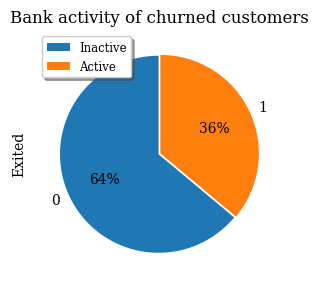

In [273]:
labels=["Inactive", "Active"]
explode = (0.01, 0.01)
data.groupby(['IsActiveMember']).sum().plot(kind='pie', y='Exited', autopct='%1.0f%%', #colors=colors,
                                       explode=explode, startangle=90, figsize=(3, 3))
legend = plt.legend(labels, shadow=True, fontsize='small')
plt.title('Bank activity of churned customers')
plt.savefig('churn_activity_pie.png', dpi=300)
plt.show()

C:\Users\Connor\AppData\Local\Temp\ipykernel_268\1692979362.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  housing.groupby(['Geography']).sum().plot(kind='pie', y='Exited', autopct='%1.0f%%', #colors=colors,


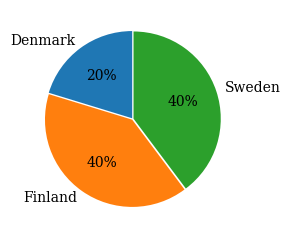

In [282]:
labels=["Sweden", "Denmark", "Finland"]
#colors = ['blue', 'red', 'white']
explode = (0.01, 0.01, 0.01)
housing.groupby(['Geography']).sum().plot(kind='pie', y='Exited', autopct='%1.0f%%', #colors=colors,
                                       explode=explode, startangle=90, figsize=(3, 3), legend=None)
#legend = plt.legend(labels, shadow=True, fontsize='small')
#plt.title('Geography of churned customers')
plt.ylabel('')
plt.savefig('churn_geography_pie.png', dpi=300)
plt.show()

In [268]:
814/(814+1695)

0.32443204463929853

In [37]:
exit[exit['Geography']==3].shape

(814, 11)

In [38]:
housing[housing['Geography']=='Finland'].shape

(2509, 14)

In [39]:
housing[housing['Geography']=='Finland'].shape[0]

2509

In [40]:
814*100/2509

32.44320446392985

In [41]:
814/2509

0.32443204463929853

In [42]:
exit[exit['Geography']==1].shape

(810, 11)

In [43]:
housing[housing['Geography']=='Sweden'].shape

(5014, 14)

In [44]:
810*100/5014

16.15476665337056

In [45]:
exit[exit['Geography']==2].shape

(413, 11)

In [46]:
housing[housing['Geography']=='Denmark'].shape

(2477, 14)

In [47]:
413*100/2477

16.67339523617279

In [48]:
housing.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [49]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [50]:
# select rows by multiple column conditions
housing[(housing['Exited']==1) & (housing['Geography']=='Finland')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Finland,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Finland,Male,58,1,132602.88,1,1,0,5097.67,1
46,47,15602280,Martin,829,Finland,Female,27,9,112045.67,1,1,1,119708.21,1
47,48,15771573,Okagbue,637,Finland,Female,39,9,137843.80,1,1,1,117622.80,1
53,54,15702298,Parkhill,655,Finland,Male,41,8,125561.97,1,0,0,164040.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,9961,15681026,Lucciano,795,Finland,Female,33,9,104552.72,1,1,1,120853.83,1
9975,9976,15666295,Smith,610,Finland,Male,50,1,113957.01,2,1,0,196526.55,1
9981,9982,15672754,Burbidge,498,Finland,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Finland,Female,46,7,137145.12,1,1,0,115146.40,1


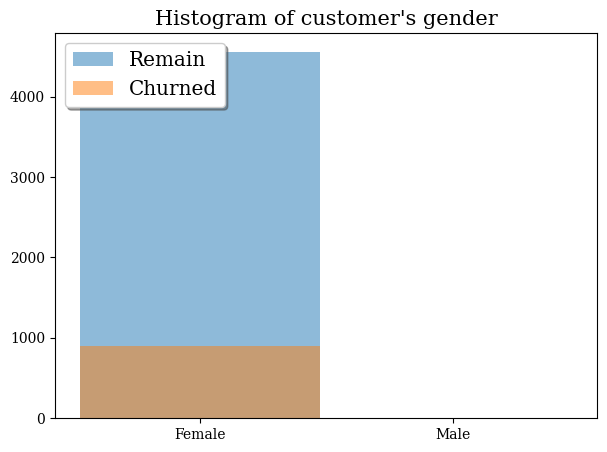

In [51]:
fig = plt.figure(figsize=(7,5))
binning = np.arange(3) + 0.5
n, bins1, patches = plt.hist(remain['Gender'], alpha=0.5, label='Remain', bins=binning, rwidth=0.95)
n, bins2, patches = plt.hist(exit['Gender'], alpha=0.5, label='Churned', bins=binning, rwidth=0.95)
#plt.xticks(range(4))
xticks = [1, 2]
xticks_labels = ['Female', 'Male']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title("Histogram of customer's gender", fontsize = 15)
plt.show()

In [52]:
np.arange(4) + 0.5

array([0.5, 1.5, 2.5, 3.5])

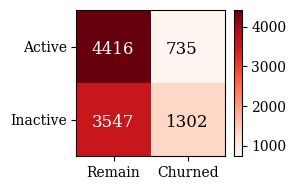

In [53]:
#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()

plt.rcParams["figure.figsize"] = [3,2]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Exited'], y=data['IsActiveMember'], bins = [2,2], cmap='Reds')
fig.colorbar(im, ax=ax)
xticks = [0.25, 0.75]
xticks_labels = ['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)

yticks = [0.25, 0.75]
yticks_labels = ['Inactive', 'Active']
plt.yticks(yticks, labels = yticks_labels)

#plt.ylabel('Active member')
my_color = 'w'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        if j==1: my_color='black'
        else: my_color = 'w'
        ax.text(xbins[j]+0.1,ybins[i]+0.2, hist.T[i,j].astype(int), color=my_color, size='large')
        
plt.show()

In [54]:
735*100/(4416+735) # active members who left

14.269073966220152

In [235]:
735*100/(1302+735) # churned members who is acive

36.08247422680412

In [236]:
1302*100/(1302+735) # churned members who is inacive

63.91752577319588

In [206]:
1302*100/(3547+1302) # in active members who left

26.850897092183956

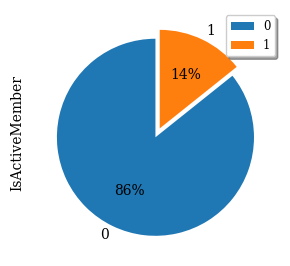

In [57]:
# Taken from https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
# and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

# Defining colors for the pie chart
#colors = ['pink', 'silver', 'steelblue']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)

#data.groupby(['Exited']).sum().plot(kind='pie', y='IsActiveMember', autopct='%1.0f%%', 
data.groupby(['Exited']).sum().plot(kind='pie', y='IsActiveMember', autopct='%1.0f%%', #colors=colors,
                                       startangle=90, explode=explode, figsize=(3, 3))
#data.groupby(['Exited']).sum().plot(kind='pie', y='HasCrCard', autopct='%1.0f%%', #colors=colors,
#                                       startangle=90, explode=explode, ax=ax)#, figsize=(3, 3))

legend = plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.show()

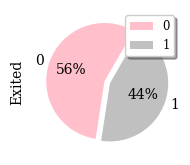

In [237]:
# Taken from https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/

# Defining colors for the pie chart
colors = ['pink', 'silver', 'steelblue']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)

data.groupby(['Gender']).sum().plot(kind='pie', y='Exited', autopct='%1.0f%%',
  startangle=60, explode=explode, colors=colors)
legend = plt.legend(loc='upper right', shadow=True, fontsize='small')

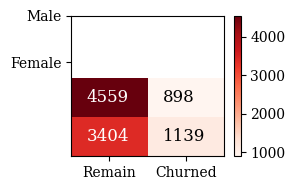

In [59]:
#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()

plt.rcParams["figure.figsize"] = [3,2]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Exited'], y=data['Gender'], bins = [2,2], cmap='Reds')
fig.colorbar(im, ax=ax)
xticks = [0.25, 0.75]
xticks_labels = ['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)

yticks = [1.2, 1.8]
yticks_labels = ['Female', 'Male']
plt.yticks(yticks, labels = yticks_labels)

#plt.ylabel('Active member')
my_color = 'w'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        if j==1: my_color='black'
        else: my_color = 'w'
        ax.text(xbins[j]+0.1,ybins[i]+0.2, hist.T[i,j].astype(int), color=my_color, size='large')
        
plt.show()

In [60]:
4559+3404+898+1139

10000

In [61]:
3404/(3404+4559)

0.4274770815019465

In [62]:
4559/(3404+4559)

0.5725229184980535

In [63]:
898/(898+1139)

0.4408443789887089

In [64]:
1139/(3404+1139)

0.2507153863086066

In [65]:
housing.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [66]:
a = data.groupby(['Exited'])
a.sum()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5190707,13417,4559,297883,40080,5.792708e+08,12297,5631,4416,7.942168e+08
1,1314581,4078,898,91335,10048,1.855881e+08,3005,1424,735,2.066856e+08


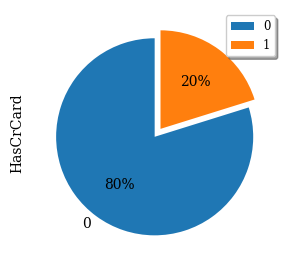

In [67]:
# Taken from https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
# and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

# Defining colors for the pie chart
#colors = ['pink', 'silver', 'steelblue']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)

#data.groupby(['Exited']).sum().plot(kind='pie', y='IsActiveMember', autopct='%1.0f%%', 
#data.groupby(['Exited']).sum().plot(kind='pie', y='Gender', autopct='%1.0f%%', #colors=colors,
#                                       startangle=90, explode=explode, figsize=(3, 3))
data.groupby(['Exited']).sum().plot(kind='pie', y='HasCrCard', autopct='%1.0f%%', #colors=colors,
                                       startangle=90, explode=explode, figsize=(3, 3))

legend = plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.show()

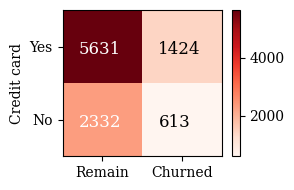

In [68]:
#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()

plt.rcParams["figure.figsize"] = [3,2]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Exited'], y=data['HasCrCard'], bins = [2,2], cmap='Reds')
fig.colorbar(im, ax=ax)
xticks = [0.25, 0.75]
xticks_labels = ['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)

yticks = [0.25, 0.75]
yticks_labels = ['No', 'Yes']
plt.yticks(yticks, labels = yticks_labels)

plt.ylabel('Credit card')
my_color = 'w'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        if j==1: my_color='black'
        else: my_color = 'w'
        ax.text(xbins[j]+0.1,ybins[i]+0.2, hist.T[i,j].astype(int), color=my_color, size='large')
        
plt.show()

In [69]:
5631+2332+1424+613

10000

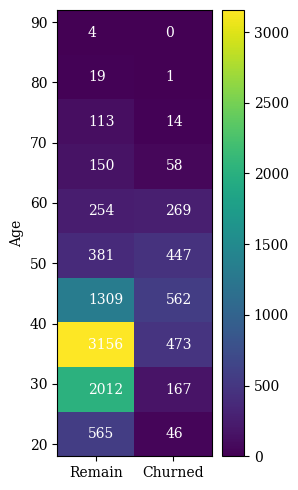

In [133]:


#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()

plt.rcParams["figure.figsize"] = [3, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Exited'], y=data['Age'], bins = [2,10])#, cmap='gist_rainbow')
fig.colorbar(im, ax=ax)
xticks = [0.25, 0.75]
xticks_labels = ['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)

my_color = 'w'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+0.2,ybins[i]+3, hist.T[i,j].astype(int), color=my_color, size='medium')#, va='center', ha='center')
        
plt.ylabel('Age')
plt.show()

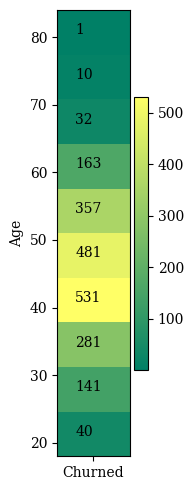

In [140]:
#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()

plt.rcParams["figure.figsize"] = [2, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=exit['Exited'], y=exit['Age'], bins = [1,10], cmap='summer')
fig.colorbar(im, ax=ax)

xticks = [1.0]
xticks_labels = ['Churned']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
my_color = 'black'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+0.25,ybins[i]+3, hist.T[i,j].astype(int), color=my_color, size='medium')#, va='center', ha='center')
plt.ylabel('Age')
plt.show()

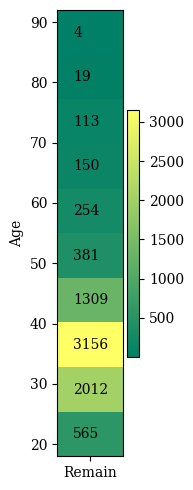

In [141]:
#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()

plt.rcParams["figure.figsize"] = [2, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=remain['Exited'], y=remain['Age'], bins = [1,10], cmap='summer')
fig.colorbar(im, ax=ax)

xticks = [0.0]
xticks_labels = ['Remain']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
my_color = 'black'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+0.25,ybins[i]+3, hist.T[i,j].astype(int), color=my_color, size='medium')#, va='center', ha='center')
#plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

In [73]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [74]:
data['Age'].min()

18

In [75]:
data['Age'].max()

92

In [76]:
print(data['EstimatedSalary'].min(), data['EstimatedSalary'].max())

11.58 199992.48


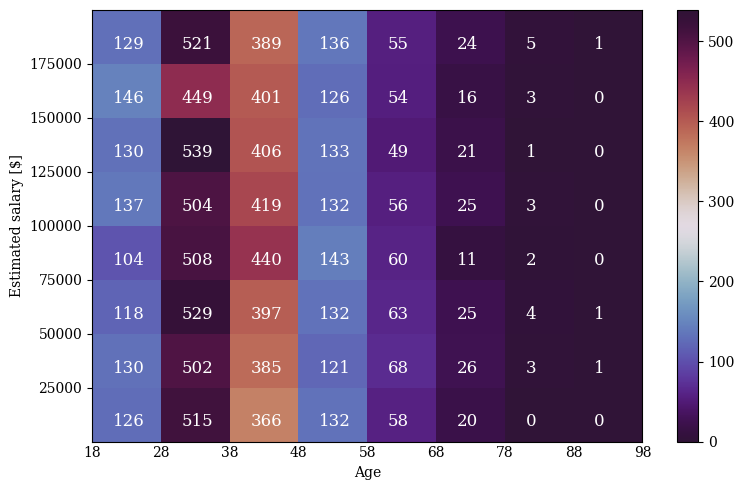

In [77]:
#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()
bins10 = [18, 28, 38, 48, 58, 68, 78, 88, 98]
bins5 = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88]
ybins = 8
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Age'], y=data['EstimatedSalary'],  bins = [bins10, ybins], cmap='twilight_shifted')
fig.colorbar(im, ax=ax)
xticks = bins10
xticks_labels = bins10 #['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
ax.tick_params(axis='x', which='both',length=0)
plt.xlabel('Age')
plt.ylabel('Estimated salary [$]')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+3,ybins[i]+7000, hist.T[i,j].astype(int), color="w", size='large')
plt.savefig('heatmap_salaryVSage.png', dpi=300)
plt.show()

In [78]:
print(data['Balance'].min(), data['Balance'].max())

0.0 250898.09


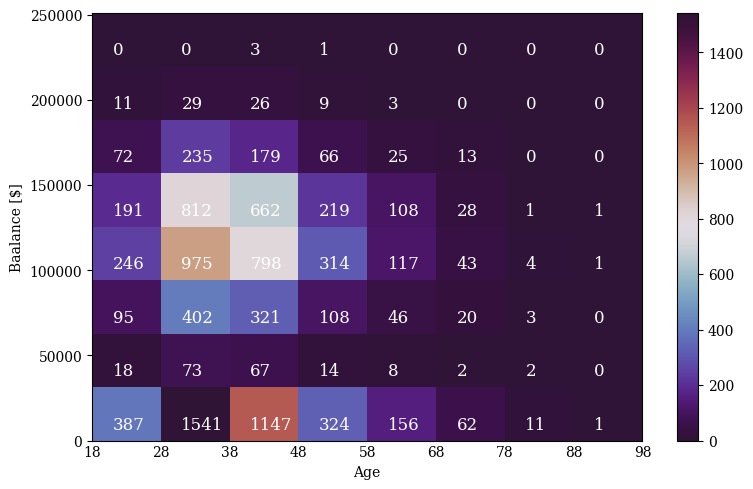

In [79]:
#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()
#bins10 = [18, 28, 38, 48, 58, 68, 78, 88, 98]
#bins5 = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88]
ybins = 8
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Age'], y=data['Balance'],  bins = [bins10, ybins], cmap='twilight_shifted')
fig.colorbar(im, ax=ax)
xticks = bins10
xticks_labels = bins10 #['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
ax.tick_params(axis='x', which='both',length=0)
plt.xlabel('Age')
plt.ylabel('Baalance [$]')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+3,ybins[i]+7000, hist.T[i,j].astype(int), color="w", size='large')
        
plt.show()

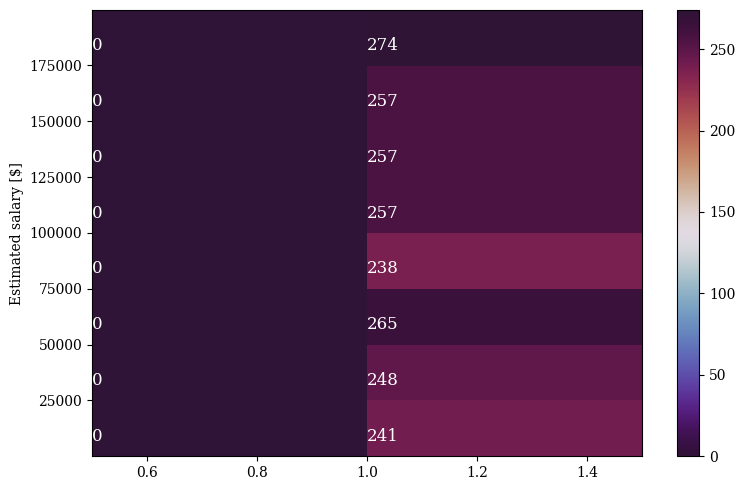

In [80]:
#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()
bins10 = [18, 28, 38, 48, 58, 68, 78, 88, 98]
bins5 = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88]

plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=exit['Exited'], y=exit['EstimatedSalary'],  bins = [2, 8], cmap='twilight_shifted')
fig.colorbar(im, ax=ax)
#xticks = bins10
#xticks_labels = bins10 #['Remain', 'Churned']
#plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
#plt.xlabel('Age')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j],ybins[i]+7000, hist.T[i,j].astype(int), color="w", size='large')
       
    
plt.ylabel('Estimated salary [$]')
plt.show()

In [81]:
# show the NaN entries
data[data.isnull().any(axis=1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [82]:
data.dropna(inplace=True)

In [83]:
data[data.isnull().any(axis=1)]
# this should show no entires with NaN

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Data correlation
The corelation of features is inspected. This is done by plotting a correlation matrix of all numerical features. Note that if there are non-numerical parameters in the dataset, the numerical parameters will still be automatically selected to make this matrix.

In [84]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

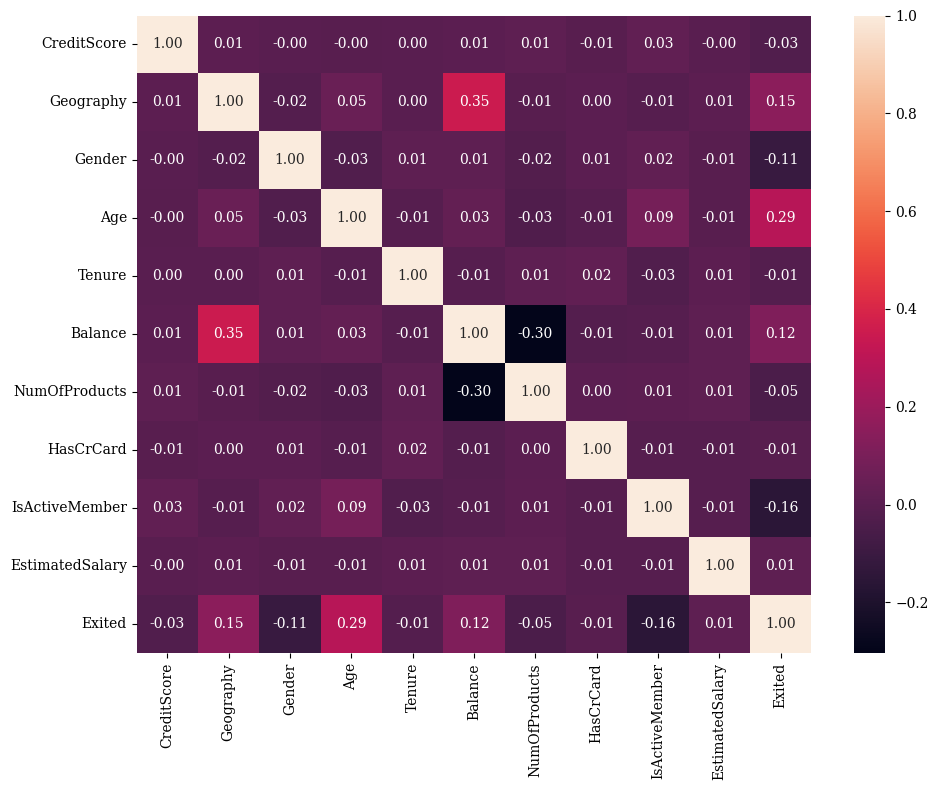

In [85]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')#, cmap='seismic')
#plt.savefig('line_plot_hq.png', dpi=300)  
plt.savefig('heatmap_all.png', dpi=300)
plt.show()

No strong correlation. Use everything

## Training

In [184]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [185]:
# splitting data for training
X = data.drop(['Exited'], axis=1)
Y = data['Exited']

# 80% of data for training and 20% for testing 
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=4)

In [88]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(x_train, y_train)
print("score on test: " + str(mnb.score(x_test, y_test)))
print("score on train: "+ str(mnb.score(x_train, y_train)))

score on test: 0.542
score on train: 0.55575


In [89]:
# apply the model to the test data
y_pred_1 = mnb.predict(x_test)

In [90]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), y_pred_1)
metrics.auc(fpr, tpr)

0.5280863497821104

In [91]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
print("score on test: " + str(lr.score(x_test, y_test)))
print("score on train: "+ str(lr.score(x_train, y_train)))

score on test: 0.799
score on train: 0.78825


In [92]:
# apply the model to the test data
y_pred_2 = lr.predict(x_test)

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), y_pred_2)
metrics.auc(fpr, tpr)

0.5228532204841432

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)
print("train shape: " + str(x_train.shape))
print("score on test: " + str(knn.score(x_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))

train shape: (8000, 10)
score on test: 0.765
score on train: 0.817


In [95]:
# apply the model to the test data
y_pred_3 = knn.predict(x_test)

In [96]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), y_pred_3)
metrics.auc(fpr, tpr)

0.505459835260334

In [97]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.765
score on train: 0.76325


C:\Users\Connor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [98]:
# apply the model to the test data
y_pred_4 = svm.predict(x_test)

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), y_pred_4)
metrics.auc(fpr, tpr)

0.5282815688052594

In [100]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))

score on test: 0.7915
score on train: 1.0


In [101]:
# apply the model to the test data
y_pred_5 = clf.predict(x_test)

In [102]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), y_pred_5)
metrics.auc(fpr, tpr)

0.6978985616766165

In [103]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train, y_train)
print("score on test: " + str(rf.score(x_test, y_test)))
print("score on train: "+ str(rf.score(x_train, y_train)))

score on test: 0.871
score on train: 0.889875


In [104]:
# apply the model to the test data
y_pred_6 = rf.predict(x_test)

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), y_pred_6)
metrics.auc(fpr, tpr)

0.7170331746391597

In [190]:
model_RF = RandomForestRegressor()
model_RF.fit(x_train, y_train)
Y_pred_RF = model_RF.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), Y_pred_RF)
metrics.auc(fpr, tpr)

0.8533117962669085

In [284]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
y_clf = clf.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), y_clf)
metrics.auc(fpr, tpr)

0.5

In [192]:
model_LR = LinearRegression()  
model_LR.fit(x_train, y_train)
Y_pred_LR = model_LR.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), Y_pred_LR)
metrics.auc(fpr, tpr)

0.7713827804226807

In [194]:
from sklearn.linear_model import LogisticRegression
model_LoR = LogisticRegression()
model_LoR.fit(x_train, y_train)
Y_pred_LoR = model_LoR.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), Y_pred_LoR)
metrics.auc(fpr, tpr)

0.5228532204841432

In [196]:
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(x_train, y_train)
# Predict
result = regr.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), result)
metrics.auc(fpr, tpr)

0.7517727146779516

### Random forest

In [ ]:
print("score on test: " + str(model_RF.score(X_test, Y_test)))
print("score on train: "+ str(model_RF.score(X_train, Y_train)))

In [ ]:
# compare the predicted value with the actual price
df_comp_RF = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_RF})
df_comp_RF

In [ ]:
df_comp_RF.plot.scatter(x='Actual', y='Predicted', alpha=0.1)

In [ ]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(Y_test, Y_pred_RF))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_RF)))

In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)
print("train shape: " + str(x_train.shape))
print("score on test: " + str(knn.score(x_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))

train shape: (8000, 10)
score on test: 0.765
score on train: 0.817


In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, Y_train)
print("score on test: " + str(svm.score(X_test, Y_test)))
print("score on train: "+ str(svm.score(X_train, Y_train)))

In [189]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), Y_pred_RF)
metrics.auc(fpr, tpr)

0.8528253230559965

In [ ]:
Y_test

In [201]:
# make a copy of the housing data
noZero = pd.DataFrame(data)

In [202]:
test = data[(data['Balance']!=0)]

In [203]:
test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
7,376,3,0,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...
9991,597,1,0,53,4,88381.21,1,1,0,69384.71,1
9993,644,1,1,28,7,155060.41,1,1,0,29179.52,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9998,772,3,1,42,3,75075.31,2,1,0,92888.52,1


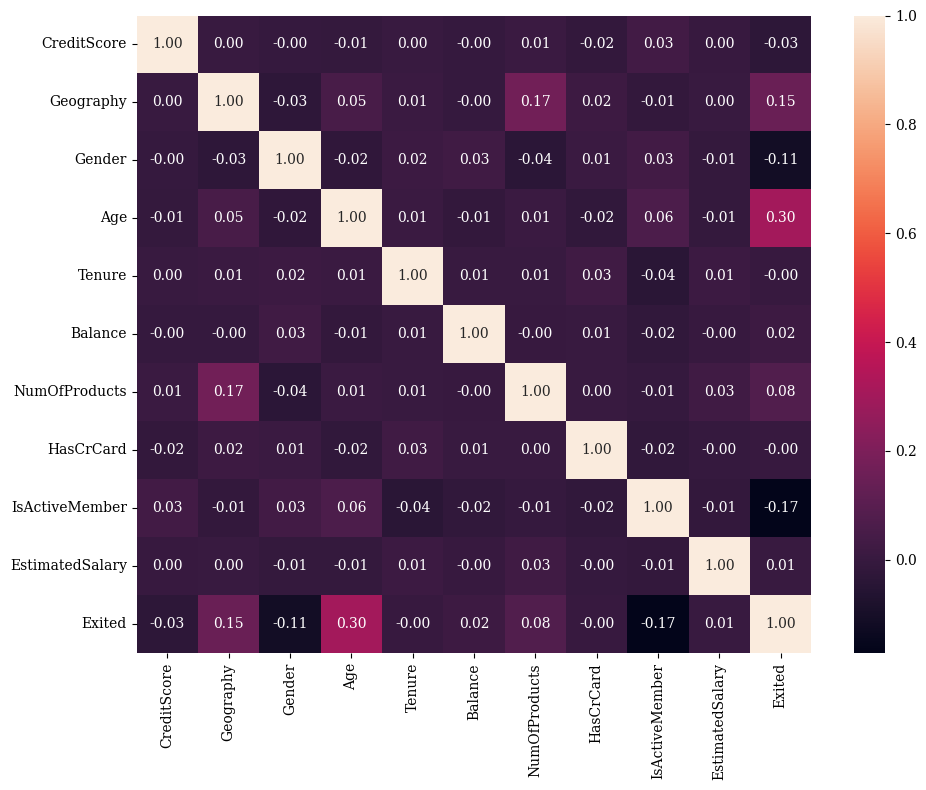

In [204]:
plt.figure(figsize=(10,8))
sns.heatmap(test.corr(), annot=True, fmt='.2f')#, cmap='seismic')
#plt.savefig('line_plot_hq.png', dpi=300)  
#plt.savefig('heatmap_all.png', dpi=300)
plt.show()

In [205]:
# splitting data for training
x = test.drop(['Exited'], axis=1)
y = test['Exited']

# 80% of data for training and 20% for testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

model_RF = RandomForestRegressor()
model_RF.fit(x_train, y_train)
Y_pred_RF = model_RF.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), Y_pred_RF)
metrics.auc(fpr, tpr)

0.8129417358451773